# Getting Started with AuctionGym
## Effects of Bid Shading in First-Price Auctions

AuctionGym has several configuration options that detail the type of auction, how bidders behave, and how confounded the contextual information is that bidders observe. To avoid clutter, we define these in configuration files.
For the purposes of this introductory notebook, we will ignore some aspects such as repeated runs.

We parse an existing file, detailing a first-price auction with oracle bidders.
We will look into the effects of bid shading on the auctioneer's revenue, social welfare and surplus.
For this, we repeat simulated experiments with the same set of bidders, changing how their bidding strategy.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from main import parse_config, instantiate_agents, instantiate_auction
from tqdm.notebook import tqdm

In [13]:
# Parse configuration file
rng, config, agent_configs, agents2items, agents2item_values,\
num_runs, max_slots, embedding_size, embedding_var,\
obs_embedding_size = parse_config('../config/FP_DR_TS.json')

In [14]:
def run_repeated_auctions():
    # Placeholders for output
    auction_revenue = []
    social_welfare = []
    social_surplus = []
    
    # Instantiate Agent and Auction objects
    agents = instantiate_agents(rng, agent_configs, agents2item_values, agents2items)

    # Instantiate Auction object
    auction, num_iter, rounds_per_iter, output_dir =\
        instantiate_auction(rng,
                            config,
                            agents2items,
                            agents2item_values,
                            agents,
                            max_slots,
                            embedding_size,
                            embedding_var,
                            obs_embedding_size)

    # Run repeated auctions
    # This logic is encoded in the `simulation_run()` method in main.py
    for i in tqdm(range(num_iter)):

        # Simulate impression opportunities
        for _ in range(rounds_per_iter):
            auction.simulate_opportunity()

        # Log 'Gross utility' or welfare
        social_welfare.append(sum([agent.gross_utility for agent in auction.agents]))

        # Log 'Net utility' or surplus
        social_surplus.append(sum([agent.net_utility for agent in auction.agents]))
        
        # Update agents (does nothing in this example, as we have truthful oracles)
        # Clear running metrics
        for agent_id, agent in enumerate(auction.agents):
            agent.update(iteration=i)
            agent.clear_utility()
            agent.clear_logs()

        # Log revenue
        auction_revenue.append(auction.revenue)
        auction.clear_revenue()
        
    # Rescale metrics per auction round
    auction_revenue = np.array(auction_revenue) / rounds_per_iter
    social_welfare = np.array(social_welfare) / rounds_per_iter
    social_surplus = np.array(social_surplus) / rounds_per_iter
    
    return auction_revenue, social_welfare, social_surplus

  0%|          | 0/10 [00:00<?, ?it/s]


DR 1:  39%|███▉      | 6373/16384 [00:01<00:02, 3965.42it/s]


Stopping at Epoch 6373



DR 1: 100%|██████████| 32768/32768 [00:07<00:00, 4147.20it/s]


AUC predicting P(win):				 0.7781423188993821
Estimated Utility	 Mean Error:			 0.3183855211608257
Estimated Utility	 Mean Absolute Error:	 0.3329429516773963



Initialising Policy:  58%|█████▊    | 9434/16384 [00:07<00:05, 1220.14it/s]


Stopping at Epoch 9434
Predicted mu Gammas:  tensor(0.9833, grad_fn=<MinBackward1>) tensor(1.0065, grad_fn=<MaxBackward1>) tensor(1.0001, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0443, grad_fn=<MinBackward1>) tensor(0.0726, grad_fn=<MaxBackward1>) tensor(0.0508, grad_fn=<MeanBackward0>)



DR 1:  17%|█▋        | 5607/32768 [00:06<00:33, 813.63it/s]


Stopping at Epoch 5607
DR 1 Number of samples:  torch.Size([6673, 2])
DR 1 Predicted Gammas:  0.70657355 0.8729611 0.7752434



DR 2:  33%|███▎      | 5364/16384 [00:01<00:03, 2931.10it/s]


Stopping at Epoch 5364



DR 2: 100%|██████████| 32768/32768 [00:07<00:00, 4170.29it/s]


AUC predicting P(win):				 0.9118337185547052
Estimated Utility	 Mean Error:			 0.7643036463421679
Estimated Utility	 Mean Absolute Error:	 0.782869190931181



Initialising Policy:  96%|█████████▌| 15647/16384 [00:12<00:00, 1239.01it/s]


Stopping at Epoch 15647
Predicted mu Gammas:  tensor(0.9972, grad_fn=<MinBackward1>) tensor(1.0006, grad_fn=<MaxBackward1>) tensor(0.9998, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0381, grad_fn=<MinBackward1>) tensor(0.1112, grad_fn=<MaxBackward1>) tensor(0.0489, grad_fn=<MeanBackward0>)



DR 2:   0%|          | 81/32768 [00:00<00:40, 802.23it/s]

Epoch 00123: reducing learning rate of group 0 to 1.4000e-03.



DR 2:   1%|          | 242/32768 [00:00<00:40, 797.35it/s]

Epoch 00224: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   1%|          | 322/32768 [00:00<00:41, 787.42it/s]

Epoch 00325: reducing learning rate of group 0 to 5.6000e-05.



DR 2:   1%|▏         | 483/32768 [00:00<00:40, 791.74it/s]

Epoch 00426: reducing learning rate of group 0 to 1.1200e-05.


DR 2:   2%|▏         | 541/32768 [00:00<00:40, 789.59it/s]


Epoch 00527: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 541
DR 2 Number of samples:  torch.Size([6689, 2])
DR 2 Predicted Gammas:  1.0 1.0 1.0



DR 3:  31%|███       | 5074/16384 [00:01<00:03, 3284.99it/s]


Stopping at Epoch 5074



DR 3: 100%|██████████| 32768/32768 [00:08<00:00, 3940.68it/s]


AUC predicting P(win):				 0.8497535554182325
Estimated Utility	 Mean Error:			 0.5421178537904109
Estimated Utility	 Mean Absolute Error:	 0.5786589520895457



Initialising Policy:  85%|████████▌ | 14001/16384 [00:11<00:01, 1206.62it/s]


Stopping at Epoch 14001
Predicted mu Gammas:  tensor(0.9901, grad_fn=<MinBackward1>) tensor(1.0086, grad_fn=<MaxBackward1>) tensor(0.9993, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0314, grad_fn=<MinBackward1>) tensor(0.1044, grad_fn=<MaxBackward1>) tensor(0.0497, grad_fn=<MeanBackward0>)



DR 3:   0%|          | 76/32768 [00:00<00:43, 749.63it/s]

Epoch 00123: reducing learning rate of group 0 to 1.4000e-03.



DR 3:   1%|          | 233/32768 [00:00<00:41, 776.67it/s]

Epoch 00224: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   1%|          | 314/32768 [00:00<00:41, 786.86it/s]

Epoch 00325: reducing learning rate of group 0 to 5.6000e-05.



DR 3:   1%|▏         | 476/32768 [00:00<00:40, 796.56it/s]

Epoch 00426: reducing learning rate of group 0 to 1.1200e-05.


DR 3:   2%|▏         | 537/32768 [00:00<00:41, 784.81it/s]


Epoch 00527: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 537
DR 3 Number of samples:  torch.Size([6638, 2])
DR 3 Predicted Gammas:  1.0 1.0 1.0



DR 1:  15%|█▍        | 2434/16384 [00:00<00:03, 3846.42it/s]


Stopping at Epoch 2434
AUC predicting P(win):				 0.6887531576866215
Estimated Utility	 Mean Error:			 0.017549720007503582
Estimated Utility	 Mean Absolute Error:	 0.14001303551186425



DR 1:  51%|█████▏    | 16854/32768 [00:04<00:03, 4108.42it/s]

Epoch 16346: reducing learning rate of group 0 to 6.0000e-04.
Epoch 16684: reducing learning rate of group 0 to 1.2000e-04.
Epoch 16941: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  55%|█████▍    | 17943/32768 [00:04<00:03, 3973.39it/s]


Epoch 17198: reducing learning rate of group 0 to 4.8000e-06.
Epoch 17455: reducing learning rate of group 0 to 9.6000e-07.
Epoch 17712: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 17943
AUC predicting P(win):				 0.6855874955190023
Estimated Utility	 Mean Error:			 0.04982935073940151
Estimated Utility	 Mean Absolute Error:	 0.1559558145518764



DR 1:   4%|▎         | 1214/32768 [00:01<00:39, 804.44it/s]


Stopping at Epoch 1214
DR 1 Number of samples:  torch.Size([6671, 2])
DR 1 Predicted Gammas:  0.66261923 0.7678033 0.71419466



DR 2:  35%|███▌      | 5742/16384 [00:02<00:03, 2665.08it/s]


Stopping at Epoch 5742
AUC predicting P(win):				 0.8242810891818692
Estimated Utility	 Mean Error:			 0.4169100493199532
Estimated Utility	 Mean Absolute Error:	 0.49501652659183487



DR 2:  74%|███████▍  | 24334/32768 [00:05<00:02, 4128.36it/s]

Epoch 23796: reducing learning rate of group 0 to 6.0000e-04.
Epoch 24054: reducing learning rate of group 0 to 1.2000e-04.
Epoch 24311: reducing learning rate of group 0 to 2.4000e-05.
Epoch 24568: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  77%|███████▋  | 25183/32768 [00:06<00:01, 4102.52it/s]


Epoch 24825: reducing learning rate of group 0 to 9.6000e-07.
Epoch 25082: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 25183
AUC predicting P(win):				 0.8321385091418112
Estimated Utility	 Mean Error:			 0.416910313013935
Estimated Utility	 Mean Absolute Error:	 0.49501679028581674



DR 2:   1%|          | 231/32768 [00:00<00:42, 763.69it/s]

Epoch 00105: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00206: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   1%|          | 383/32768 [00:00<00:44, 735.10it/s]

Epoch 00307: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00408: reducing learning rate of group 0 to 1.1200e-05.



DR 2:   2%|▏         | 517/32768 [00:00<00:43, 738.70it/s]


Epoch 00509: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 517
DR 2 Number of samples:  torch.Size([6721, 2])
DR 2 Predicted Gammas:  1.0 1.0 1.0



DR 3:  12%|█▏        | 2044/16384 [00:00<00:04, 3536.40it/s]


Stopping at Epoch 2044
AUC predicting P(win):				 0.8323013732793872
Estimated Utility	 Mean Error:			 0.07495006975889842
Estimated Utility	 Mean Absolute Error:	 0.23688990583014147



DR 3:  63%|██████▎   | 20600/32768 [00:05<00:02, 4064.08it/s]

Epoch 20004: reducing learning rate of group 0 to 6.0000e-04.
Epoch 20298: reducing learning rate of group 0 to 1.2000e-04.
Epoch 20555: reducing learning rate of group 0 to 2.4000e-05.
Epoch 20812: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  66%|██████▌   | 21594/32768 [00:05<00:02, 4019.50it/s]


Epoch 21069: reducing learning rate of group 0 to 9.6000e-07.
Epoch 21326: reducing learning rate of group 0 to 1.9200e-07.
Epoch 21583: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 21594
AUC predicting P(win):				 0.8362137616162009
Estimated Utility	 Mean Error:			 0.07495016524591405
Estimated Utility	 Mean Absolute Error:	 0.23689000131715707



DR 3:   1%|          | 244/32768 [00:00<00:40, 810.92it/s]

Epoch 00104: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00205: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   1%|          | 408/32768 [00:00<00:40, 808.00it/s]

Epoch 00306: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00407: reducing learning rate of group 0 to 1.1200e-05.



DR 3:   2%|▏         | 518/32768 [00:00<00:41, 783.77it/s]


Epoch 00508: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 518
DR 3 Number of samples:  torch.Size([6608, 2])
DR 3 Predicted Gammas:  1.0 1.0 1.0



DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3665.42it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7880071934924829
Estimated Utility	 Mean Error:			 -0.009102135019069722
Estimated Utility	 Mean Absolute Error:	 0.1744416353651677



DR 1:   8%|▊         | 2766/32768 [00:00<00:07, 3888.94it/s]

Epoch 02264: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02604: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02861: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  12%|█▏        | 3880/32768 [00:00<00:07, 3892.74it/s]

Epoch 03118: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03375: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03632: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3880
AUC predicting P(win):				 0.7958664057065425
Estimated Utility	 Mean Error:			 0.017054960114929494
Estimated Utility	 Mean Absolute Error:	 0.1804093389116481




DR 1:   7%|▋         | 2216/32768 [00:02<00:40, 755.85it/s]


Stopping at Epoch 2216
DR 1 Number of samples:  torch.Size([6657, 2])
DR 1 Predicted Gammas:  0.58973074 0.75047606 0.66280574



DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3251.61it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7908665002397941
Estimated Utility	 Mean Error:			 0.040571367352173045
Estimated Utility	 Mean Absolute Error:	 0.27303458351899035



DR 2:   9%|▊         | 2810/32768 [00:00<00:07, 4012.97it/s]

Epoch 02097: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02423: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02680: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  11%|█         | 3682/32768 [00:00<00:07, 3991.46it/s]


Epoch 02937: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03194: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03451: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3682
AUC predicting P(win):				 0.7966779805963156
Estimated Utility	 Mean Error:			 0.040571367352173045
Estimated Utility	 Mean Absolute Error:	 0.27303458351899035



DR 2:   1%|▏         | 490/32768 [00:00<00:39, 814.85it/s]

Epoch 00356: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00457: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   2%|▏         | 654/32768 [00:00<00:39, 807.96it/s]

Epoch 00558: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00659: reducing learning rate of group 0 to 1.1200e-05.



DR 2:   2%|▏         | 767/32768 [00:00<00:39, 804.86it/s]


Epoch 00760: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 767
DR 2 Number of samples:  torch.Size([6607, 2])
DR 2 Predicted Gammas:  1.0 1.0 1.0



DR 3:   6%|▋         | 1046/16384 [00:00<00:05, 2981.68it/s][A


Stopping at Epoch 1046
AUC predicting P(win):				 0.761325687399077
Estimated Utility	 Mean Error:			 0.0070130429969937945
Estimated Utility	 Mean Absolute Error:	 0.3368071373233966



DR 3:  11%|█         | 3653/32768 [00:00<00:07, 4019.38it/s]

Epoch 03136: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03393: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03650: reducing learning rate of group 0 to 2.4000e-05.
Epoch 03907: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  15%|█▌        | 4926/32768 [00:01<00:06, 4024.35it/s]


Epoch 04164: reducing learning rate of group 0 to 9.6000e-07.
Epoch 04421: reducing learning rate of group 0 to 1.9200e-07.
Epoch 04678: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 4926
AUC predicting P(win):				 0.7629160967096038
Estimated Utility	 Mean Error:			 0.0070130429969937945
Estimated Utility	 Mean Absolute Error:	 0.3368071373233966



DR 3:   1%|          | 398/32768 [00:00<00:41, 787.71it/s]

Epoch 00265: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00366: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   2%|▏         | 555/32768 [00:00<00:42, 766.46it/s]

Epoch 00467: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00568: reducing learning rate of group 0 to 1.1200e-05.



DR 3:   2%|▏         | 676/32768 [00:00<00:41, 770.24it/s]


Epoch 00669: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 676
DR 3 Number of samples:  torch.Size([6736, 2])
DR 3 Predicted Gammas:  1.0 1.0 1.0



DR 1:   6%|▋         | 1025/16384 [00:00<00:03, 4339.71it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7829748392796676
Estimated Utility	 Mean Error:			 0.005395858628328258
Estimated Utility	 Mean Absolute Error:	 0.1423667080983939



DR 1:   7%|▋         | 2416/32768 [00:00<00:07, 4060.42it/s]

Epoch 01816: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02073: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02330: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02587: reducing learning rate of group 0 to 4.8000e-06.



DR 1:   9%|▉         | 3072/32768 [00:00<00:07, 4004.11it/s]


Epoch 02844: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 3072
AUC predicting P(win):				 0.7951777620735277
Estimated Utility	 Mean Error:			 0.0024356010179541667
Estimated Utility	 Mean Absolute Error:	 0.14056398045066837



DR 1:   3%|▎         | 834/32768 [00:01<00:41, 761.53it/s]


Stopping at Epoch 834
DR 1 Number of samples:  torch.Size([6749, 2])
DR 1 Predicted Gammas:  0.62286985 0.860626 0.73751116



DR 2:   6%|▋         | 1025/16384 [00:00<00:05, 3022.11it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7557483195993696
Estimated Utility	 Mean Error:			 0.011989248351638827
Estimated Utility	 Mean Absolute Error:	 0.30004281717259135



DR 2:   6%|▌         | 2011/32768 [00:00<00:07, 3980.38it/s]

Epoch 01271: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01528: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01785: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02042: reducing learning rate of group 0 to 4.8000e-06.



DR 2:   8%|▊         | 2553/32768 [00:00<00:07, 3973.69it/s]


Epoch 02299: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2553
AUC predicting P(win):				 0.7532946097690199
Estimated Utility	 Mean Error:			 0.011989248351638827
Estimated Utility	 Mean Absolute Error:	 0.30004281717259135



DR 2:   1%|          | 242/32768 [00:00<00:41, 777.28it/s]

Epoch 00102: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00203: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   1%|          | 402/32768 [00:00<00:41, 788.67it/s]

Epoch 00308: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00409: reducing learning rate of group 0 to 1.1200e-05.



DR 2:   2%|▏         | 645/32768 [00:00<00:40, 796.13it/s]

Epoch 00510: reducing learning rate of group 0 to 2.2400e-06.
Epoch 00611: reducing learning rate of group 0 to 4.4800e-07.


DR 2:   2%|▏         | 719/32768 [00:00<00:40, 789.97it/s]


Epoch 00712: reducing learning rate of group 0 to 8.9600e-08.
Stopping at Epoch 719
DR 2 Number of samples:  torch.Size([6602, 2])
DR 2 Predicted Gammas:  0.9653857 1.0 0.9999843



DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 2861.93it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7308673056131829
Estimated Utility	 Mean Error:			 -0.013809387241455282
Estimated Utility	 Mean Absolute Error:	 0.3371221370438139



DR 3:   6%|▌         | 2042/32768 [00:00<00:07, 4105.94it/s]

Epoch 01262: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01519: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01776: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02033: reducing learning rate of group 0 to 4.8000e-06.



DR 3:   9%|▉         | 2909/32768 [00:00<00:07, 4041.46it/s]


Epoch 02290: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02547: reducing learning rate of group 0 to 1.9200e-07.
Epoch 02804: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 2909
AUC predicting P(win):				 0.7476070976264133
Estimated Utility	 Mean Error:			 -0.013809387241455282
Estimated Utility	 Mean Absolute Error:	 0.3371221370438139



DR 3:  10%|█         | 3283/32768 [00:04<00:37, 777.06it/s]


Stopping at Epoch 3283
DR 3 Number of samples:  torch.Size([6649, 2])
DR 3 Predicted Gammas:  0.9652155 1.0 0.99599916



DR 1:   6%|▋         | 1025/16384 [00:00<00:03, 4624.30it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7902342632631586
Estimated Utility	 Mean Error:			 0.015898881373517488
Estimated Utility	 Mean Absolute Error:	 0.1520082971645172



DR 1:   1%|          | 402/32768 [00:00<00:08, 4017.55it/s]

Epoch 00480: reducing learning rate of group 0 to 6.0000e-04.



DR 1:   4%|▎         | 1197/32768 [00:00<00:08, 3887.98it/s]

Epoch 00737: reducing learning rate of group 0 to 1.2000e-04.
Epoch 00994: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01251: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01508: reducing learning rate of group 0 to 9.6000e-07.



DR 1:   5%|▌         | 1661/32768 [00:00<00:07, 3906.01it/s]


Stopping at Epoch 1661
AUC predicting P(win):				 0.7914014477988593
Estimated Utility	 Mean Error:			 0.005918221028900717
Estimated Utility	 Mean Absolute Error:	 0.1470860292636875



DR 1:   6%|▌         | 2044/32768 [00:02<00:39, 785.38it/s]


Stopping at Epoch 2044
DR 1 Number of samples:  torch.Size([6722, 2])
DR 1 Predicted Gammas:  0.51415354 0.8610836 0.6738325



DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3154.26it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7133175725903103
Estimated Utility	 Mean Error:			 -0.002530129234569072
Estimated Utility	 Mean Absolute Error:	 0.27898405884017535



DR 2:   6%|▌         | 2011/32768 [00:00<00:07, 4028.16it/s]

Epoch 01596: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01853: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02110: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02367: reducing learning rate of group 0 to 4.8000e-06.



DR 2:   8%|▊         | 2718/32768 [00:00<00:07, 4008.62it/s]


Epoch 02624: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2718
AUC predicting P(win):				 0.7275144575279519
Estimated Utility	 Mean Error:			 -0.002530129234569072
Estimated Utility	 Mean Absolute Error:	 0.27898405884017535



DR 2:   2%|▏         | 655/32768 [00:00<00:39, 811.26it/s]

Epoch 00539: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00640: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   3%|▎         | 901/32768 [00:01<00:39, 811.65it/s]

Epoch 00741: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00842: reducing learning rate of group 0 to 1.1200e-05.


DR 2:   3%|▎         | 950/32768 [00:01<00:39, 806.16it/s]


Epoch 00943: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 950
DR 2 Number of samples:  torch.Size([6665, 2])
DR 2 Predicted Gammas:  1.0 1.0 1.0



DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 2899.43it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7567500521159056
Estimated Utility	 Mean Error:			 0.011361309955973434
Estimated Utility	 Mean Absolute Error:	 0.353402168186264



DR 3:   1%|▏         | 411/32768 [00:00<00:07, 4099.88it/s]

Epoch 00390: reducing learning rate of group 0 to 6.0000e-04.
Epoch 00647: reducing learning rate of group 0 to 1.2000e-04.



DR 3:   3%|▎         | 821/32768 [00:00<00:07, 4081.70it/s]

Epoch 00904: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01161: reducing learning rate of group 0 to 4.8000e-06.



DR 3:   4%|▍         | 1296/32768 [00:00<00:07, 4076.94it/s]


Stopping at Epoch 1296
AUC predicting P(win):				 0.7562731514889114
Estimated Utility	 Mean Error:			 0.01137289536016238
Estimated Utility	 Mean Absolute Error:	 0.35340551265145814



DR 3:   0%|          | 80/32768 [00:00<00:40, 798.48it/s]

Epoch 00103: reducing learning rate of group 0 to 1.4000e-03.



DR 3:   1%|          | 243/32768 [00:00<00:40, 809.92it/s]

Epoch 00204: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   1%|          | 324/32768 [00:00<00:40, 805.43it/s]

Epoch 00305: reducing learning rate of group 0 to 5.6000e-05.



DR 3:   1%|          | 405/32768 [00:00<00:40, 805.08it/s]

Epoch 00406: reducing learning rate of group 0 to 1.1200e-05.



DR 3:   2%|▏         | 514/32768 [00:00<00:40, 801.46it/s]


Epoch 00507: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 514
DR 3 Number of samples:  torch.Size([6613, 2])
DR 3 Predicted Gammas:  1.0 1.0 1.0



DR 1:   6%|▋         | 1025/16384 [00:00<00:03, 4657.57it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.797703254159255
Estimated Utility	 Mean Error:			 -0.00039817181075172276
Estimated Utility	 Mean Absolute Error:	 0.13883897711789733



DR 1:   1%|▏         | 412/32768 [00:00<00:07, 4113.13it/s]

Epoch 00549: reducing learning rate of group 0 to 6.0000e-04.



DR 1:   4%|▍         | 1240/32768 [00:00<00:07, 4131.90it/s]

Epoch 00806: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01063: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01320: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01577: reducing learning rate of group 0 to 9.6000e-07.



DR 1:   6%|▌         | 1816/32768 [00:00<00:07, 4101.21it/s]


Stopping at Epoch 1816
AUC predicting P(win):				 0.8009575959177615
Estimated Utility	 Mean Error:			 0.005129964107328284
Estimated Utility	 Mean Absolute Error:	 0.1407078106670718



DR 1:   0%|          | 78/32768 [00:00<00:42, 777.08it/s]

Epoch 00102: reducing learning rate of group 0 to 1.4000e-03.



DR 1:   1%|          | 237/32768 [00:00<00:41, 786.91it/s]

Epoch 00203: reducing learning rate of group 0 to 2.8000e-04.



DR 1:   1%|          | 316/32768 [00:00<00:41, 783.23it/s]

Epoch 00304: reducing learning rate of group 0 to 5.6000e-05.



DR 1:   1%|          | 395/32768 [00:00<00:41, 781.38it/s]

Epoch 00405: reducing learning rate of group 0 to 1.1200e-05.



DR 1:   2%|▏         | 513/32768 [00:00<00:41, 777.27it/s]


Epoch 00506: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 513
DR 1 Number of samples:  torch.Size([6664, 2])
DR 1 Predicted Gammas:  0.47464767 0.7996538 0.6380353



DR 2:   6%|▋         | 1025/16384 [00:00<00:05, 3046.37it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7425532662774095
Estimated Utility	 Mean Error:			 -0.008760933213930476
Estimated Utility	 Mean Absolute Error:	 0.3084726694902803



DR 2:   4%|▎         | 1211/32768 [00:00<00:07, 4035.98it/s]

Epoch 00797: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01054: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01311: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01568: reducing learning rate of group 0 to 4.8000e-06.



DR 2:   6%|▌         | 2031/32768 [00:00<00:07, 3982.06it/s]


Epoch 01825: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2031
AUC predicting P(win):				 0.7425193215809252
Estimated Utility	 Mean Error:			 -0.008760933213930476
Estimated Utility	 Mean Absolute Error:	 0.3084726694902803



DR 2:   4%|▍         | 1274/32768 [00:01<00:40, 769.27it/s]

Epoch 01120: reducing learning rate of group 0 to 1.4000e-03.
Epoch 01221: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   4%|▍         | 1428/32768 [00:01<00:41, 748.86it/s]

Epoch 01322: reducing learning rate of group 0 to 5.6000e-05.
Epoch 01423: reducing learning rate of group 0 to 1.1200e-05.



DR 2:   5%|▍         | 1531/32768 [00:01<00:40, 772.15it/s]


Stopping at Epoch 1531
DR 2 Number of samples:  torch.Size([6676, 2])
DR 2 Predicted Gammas:  0.8899129 1.0 0.9753693



DR 3:   6%|▋         | 1028/16384 [00:00<00:05, 2787.34it/s][A


Stopping at Epoch 1028
AUC predicting P(win):				 0.7522670574674684
Estimated Utility	 Mean Error:			 -0.0015764104121032505
Estimated Utility	 Mean Absolute Error:	 0.3428294782767869



DR 3:   1%|          | 396/32768 [00:00<00:08, 3953.32it/s]

Epoch 00543: reducing learning rate of group 0 to 6.0000e-04.



DR 3:   4%|▎         | 1198/32768 [00:00<00:07, 3994.51it/s]

Epoch 00800: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01057: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01314: reducing learning rate of group 0 to 4.8000e-06.



DR 3:   5%|▍         | 1602/32768 [00:00<00:07, 4012.17it/s]

Epoch 01571: reducing learning rate of group 0 to 9.6000e-07.


DR 3:   5%|▌         | 1659/32768 [00:00<00:07, 3979.29it/s]


Stopping at Epoch 1659
AUC predicting P(win):				 0.7551477766121747
Estimated Utility	 Mean Error:			 -0.0015764104121032505
Estimated Utility	 Mean Absolute Error:	 0.3428294782767869



DR 3:   1%|          | 308/32768 [00:00<00:42, 758.99it/s]

Epoch 00175: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00276: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   1%|▏         | 460/32768 [00:00<00:42, 755.00it/s]

Epoch 00377: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00478: reducing learning rate of group 0 to 1.1200e-05.



DR 3:   2%|▏         | 586/32768 [00:00<00:42, 751.23it/s]


Epoch 00579: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 586
DR 3 Number of samples:  torch.Size([6660, 2])
DR 3 Predicted Gammas:  1.0 1.0 1.0



DR 1:   7%|▋         | 1117/16384 [00:00<00:03, 4885.88it/s][A


Stopping at Epoch 1117
AUC predicting P(win):				 0.8124068524693182
Estimated Utility	 Mean Error:			 -0.00600188672221668
Estimated Utility	 Mean Absolute Error:	 0.11227785483732913



DR 1:   8%|▊         | 2483/32768 [00:00<00:07, 4112.50it/s]

Epoch 01715: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02191: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02448: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  10%|█         | 3372/32768 [00:00<00:07, 4082.73it/s]


Epoch 02705: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02962: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03219: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3372
AUC predicting P(win):				 0.8120878803084517
Estimated Utility	 Mean Error:			 0.00030952278524363835
Estimated Utility	 Mean Absolute Error:	 0.11491514862791168



DR 1:   8%|▊         | 2751/32768 [00:03<00:38, 778.74it/s]


Stopping at Epoch 2751
DR 1 Number of samples:  torch.Size([6671, 2])
DR 1 Predicted Gammas:  0.6006418 0.9651149 0.81170326



DR 2:   6%|▋         | 1025/16384 [00:00<00:05, 2939.82it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7028512455836998
Estimated Utility	 Mean Error:			 0.009317914289967462
Estimated Utility	 Mean Absolute Error:	 0.3215284482996881



DR 2:   6%|▌         | 2010/32768 [00:00<00:07, 4031.62it/s]

Epoch 01358: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01615: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01872: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02129: reducing learning rate of group 0 to 4.8000e-06.



DR 2:   8%|▊         | 2627/32768 [00:00<00:07, 3975.88it/s]


Epoch 02386: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2627
AUC predicting P(win):				 0.7054868499522647
Estimated Utility	 Mean Error:			 0.010204635593271068
Estimated Utility	 Mean Absolute Error:	 0.32172278015869604



DR 2:   7%|▋         | 2155/32768 [00:02<00:39, 780.12it/s]


Stopping at Epoch 2155
DR 2 Number of samples:  torch.Size([6728, 2])
DR 2 Predicted Gammas:  0.6809847 0.9880186 0.84600097



DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 2842.56it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7693816829707534
Estimated Utility	 Mean Error:			 -0.00999031831798476
Estimated Utility	 Mean Absolute Error:	 0.3559829867578258



DR 3:   1%|▏         | 412/32768 [00:00<00:07, 4113.34it/s]

Epoch 00766: reducing learning rate of group 0 to 6.0000e-04.



DR 3:   4%|▍         | 1234/32768 [00:00<00:07, 4042.25it/s]

Epoch 01023: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01280: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01537: reducing learning rate of group 0 to 4.8000e-06.



DR 3:   5%|▌         | 1644/32768 [00:00<00:07, 4064.72it/s]

Epoch 01794: reducing learning rate of group 0 to 9.6000e-07.


DR 3:   6%|▌         | 2044/32768 [00:00<00:07, 4066.22it/s]


Stopping at Epoch 2044
AUC predicting P(win):				 0.7685329848372213
Estimated Utility	 Mean Error:			 -0.00999031831798476
Estimated Utility	 Mean Absolute Error:	 0.3559829867578258



DR 3:  14%|█▍        | 4575/32768 [00:05<00:35, 795.48it/s]


Stopping at Epoch 4575
DR 3 Number of samples:  torch.Size([6601, 2])
DR 3 Predicted Gammas:  0.71900743 1.0 0.9795907



DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3598.20it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7601960727427457
Estimated Utility	 Mean Error:			 0.01569776541760969
Estimated Utility	 Mean Absolute Error:	 0.19900037997794015



DR 1:  12%|█▏        | 4088/32768 [00:01<00:07, 4044.10it/s]

Epoch 03557: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03995: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04252: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  16%|█▌        | 5301/32768 [00:01<00:06, 4008.37it/s]

Epoch 04509: reducing learning rate of group 0 to 4.8000e-06.
Epoch 04766: reducing learning rate of group 0 to 9.6000e-07.
Epoch 05023: reducing learning rate of group 0 to 1.9200e-07.
Epoch 05280: reducing learning rate of group 0 to 1.0000e-07.


DR 1:  17%|█▋        | 5568/32768 [00:01<00:06, 4035.83it/s]


Stopping at Epoch 5568
AUC predicting P(win):				 0.7658146326839481
Estimated Utility	 Mean Error:			 0.010629855309691546
Estimated Utility	 Mean Absolute Error:	 0.19446406469626545



DR 1:   4%|▎         | 1175/32768 [00:01<00:44, 717.64it/s]


Stopping at Epoch 1175
DR 1 Number of samples:  torch.Size([6653, 2])
DR 1 Predicted Gammas:  0.63945097 1.0 0.8661582



DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3588.45it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7021738605611924
Estimated Utility	 Mean Error:			 -0.002843711905866307
Estimated Utility	 Mean Absolute Error:	 0.22347729889346762



DR 2:   7%|▋         | 2409/32768 [00:00<00:07, 3984.97it/s]

Epoch 01912: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02268: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02525: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  10%|▉         | 3205/32768 [00:00<00:07, 3941.38it/s]

Epoch 02782: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03039: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03296: reducing learning rate of group 0 to 1.9200e-07.
Epoch 03553: reducing learning rate of group 0 to 1.0000e-07.



DR 2:  11%|█         | 3662/32768 [00:00<00:07, 3964.57it/s]


Stopping at Epoch 3662
AUC predicting P(win):				 0.7039988807988539
Estimated Utility	 Mean Error:			 0.0042718818776906
Estimated Utility	 Mean Absolute Error:	 0.22573361677655704



DR 2:   4%|▍         | 1388/32768 [00:01<00:40, 772.69it/s]

Epoch 01295: reducing learning rate of group 0 to 1.4000e-03.



DR 2:   5%|▌         | 1659/32768 [00:02<00:40, 765.35it/s]


Stopping at Epoch 1659
DR 2 Number of samples:  torch.Size([6643, 2])
DR 2 Predicted Gammas:  0.6710872 0.90260273 0.7921489



DR 3:   7%|▋         | 1076/16384 [00:00<00:05, 2642.68it/s]


Stopping at Epoch 1076
AUC predicting P(win):				 0.7765289364205628
Estimated Utility	 Mean Error:			 0.008133595496617428
Estimated Utility	 Mean Absolute Error:	 0.37594953111786394



DR 3:   7%|▋         | 2431/32768 [00:00<00:07, 4051.23it/s]

Epoch 01717: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02067: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02324: reducing learning rate of group 0 to 2.4000e-05.



DR 3:   9%|▉         | 3072/32768 [00:00<00:07, 4027.95it/s]


Epoch 02581: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02838: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 3072
AUC predicting P(win):				 0.7837863469890503
Estimated Utility	 Mean Error:			 0.009985230603365439
Estimated Utility	 Mean Absolute Error:	 0.3752270872738759



DR 3:   9%|▉         | 2935/32768 [00:04<00:40, 733.48it/s]


Stopping at Epoch 2935
DR 3 Number of samples:  torch.Size([6704, 2])
DR 3 Predicted Gammas:  0.7251113 1.0 0.9757661



DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3634.30it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7951440496954957
Estimated Utility	 Mean Error:			 -0.012339351690808088
Estimated Utility	 Mean Absolute Error:	 0.20790425467996126



DR 1:  17%|█▋        | 5694/32768 [00:01<00:06, 4071.82it/s]

Epoch 04887: reducing learning rate of group 0 to 6.0000e-04.
Epoch 05242: reducing learning rate of group 0 to 1.2000e-04.
Epoch 05499: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  20%|█▉        | 6503/32768 [00:01<00:06, 4000.37it/s]

Epoch 05756: reducing learning rate of group 0 to 4.8000e-06.
Epoch 06013: reducing learning rate of group 0 to 9.6000e-07.
Epoch 06270: reducing learning rate of group 0 to 1.9200e-07.
Epoch 06527: reducing learning rate of group 0 to 1.0000e-07.


DR 1:  20%|██        | 6611/32768 [00:01<00:06, 4029.66it/s]


Stopping at Epoch 6611
AUC predicting P(win):				 0.7959485982260313
Estimated Utility	 Mean Error:			 -0.01277336780311674
Estimated Utility	 Mean Absolute Error:	 0.20622570909006233



DR 1:   6%|▌         | 1993/32768 [00:02<00:38, 800.84it/s]


Stopping at Epoch 1993
DR 1 Number of samples:  torch.Size([6635, 2])
DR 1 Predicted Gammas:  0.66728145 1.0 0.8893802



DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3596.96it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.6877509699458189
Estimated Utility	 Mean Error:			 -0.0071865709722533635
Estimated Utility	 Mean Absolute Error:	 0.21779876406624765



DR 2:   5%|▌         | 1648/32768 [00:00<00:07, 4125.54it/s]

Epoch 01183: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01574: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01831: reducing learning rate of group 0 to 2.4000e-05.



DR 2:   8%|▊         | 2760/32768 [00:00<00:07, 4108.22it/s]


Epoch 02088: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02345: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02602: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2760
AUC predicting P(win):				 0.6824130630681582
Estimated Utility	 Mean Error:			 -0.0010276722835017727
Estimated Utility	 Mean Absolute Error:	 0.22169427744680317



DR 2:   3%|▎         | 828/32768 [00:01<00:40, 796.88it/s]


Stopping at Epoch 828
DR 2 Number of samples:  torch.Size([6701, 2])
DR 2 Predicted Gammas:  0.7375596 0.90134364 0.826911



DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 2771.85it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7946601887026411
Estimated Utility	 Mean Error:			 0.00724455314433737
Estimated Utility	 Mean Absolute Error:	 0.3625406933756178



DR 3:   7%|▋         | 2404/32768 [00:00<00:07, 4033.40it/s]

Epoch 01839: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02174: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02431: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  10%|▉         | 3205/32768 [00:00<00:07, 3998.46it/s]


Epoch 02688: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02945: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03202: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3205
AUC predicting P(win):				 0.7946146153561243
Estimated Utility	 Mean Error:			 0.007130276601131
Estimated Utility	 Mean Absolute Error:	 0.36255728603503273



DR 3:   8%|▊         | 2581/32768 [00:03<00:37, 796.62it/s]


Stopping at Epoch 2581
DR 3 Number of samples:  torch.Size([6664, 2])
DR 3 Predicted Gammas:  0.5437199 1.0 0.94871646



DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3423.43it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7930400883295432
Estimated Utility	 Mean Error:			 0.006767743527907329
Estimated Utility	 Mean Absolute Error:	 0.22656756740584236



DR 1:   7%|▋         | 2429/32768 [00:00<00:07, 4033.05it/s]

Epoch 01867: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02194: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02451: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  11%|█         | 3443/32768 [00:00<00:07, 4023.92it/s]


Epoch 02708: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02965: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03222: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3443
AUC predicting P(win):				 0.7905318786803013
Estimated Utility	 Mean Error:			 0.00703529647932602
Estimated Utility	 Mean Absolute Error:	 0.22702023152773962



DR 1:   3%|▎         | 988/32768 [00:01<00:39, 799.67it/s]


Stopping at Epoch 988
DR 1 Number of samples:  torch.Size([6594, 2])
DR 1 Predicted Gammas:  0.5984676 1.0 0.8298276



DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3609.90it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7052956431501995
Estimated Utility	 Mean Error:			 0.007377892686012241
Estimated Utility	 Mean Absolute Error:	 0.22579420594688018



DR 2:   6%|▌         | 2036/32768 [00:00<00:07, 4059.87it/s]

Epoch 01473: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01730: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01987: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02244: reducing learning rate of group 0 to 4.8000e-06.



DR 2:   8%|▊         | 2709/32768 [00:00<00:07, 4047.49it/s]


Epoch 02501: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2709
AUC predicting P(win):				 0.716727320650695
Estimated Utility	 Mean Error:			 0.004529653049661125
Estimated Utility	 Mean Absolute Error:	 0.22397414297246362



DR 2:   5%|▍         | 1623/32768 [00:02<00:38, 802.43it/s]


Stopping at Epoch 1623
DR 2 Number of samples:  torch.Size([6732, 2])
DR 2 Predicted Gammas:  0.7500599 0.96436405 0.863408



DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 2921.92it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7630370265686828
Estimated Utility	 Mean Error:			 -0.0006637622670304609
Estimated Utility	 Mean Absolute Error:	 0.3422855904874346



DR 3:   6%|▌         | 2013/32768 [00:00<00:07, 4032.00it/s]

Epoch 01439: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01740: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01997: reducing learning rate of group 0 to 2.4000e-05.



DR 3:   8%|▊         | 2764/32768 [00:00<00:07, 4020.53it/s]


Epoch 02254: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02511: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2764
AUC predicting P(win):				 0.7662932583225566
Estimated Utility	 Mean Error:			 0.00012862270948702504
Estimated Utility	 Mean Absolute Error:	 0.3424165680421628



DR 3:   7%|▋         | 2359/32768 [00:03<00:39, 775.98it/s]


Stopping at Epoch 2359
DR 3 Number of samples:  torch.Size([6674, 2])
DR 3 Predicted Gammas:  0.5385692 1.0 0.9298779


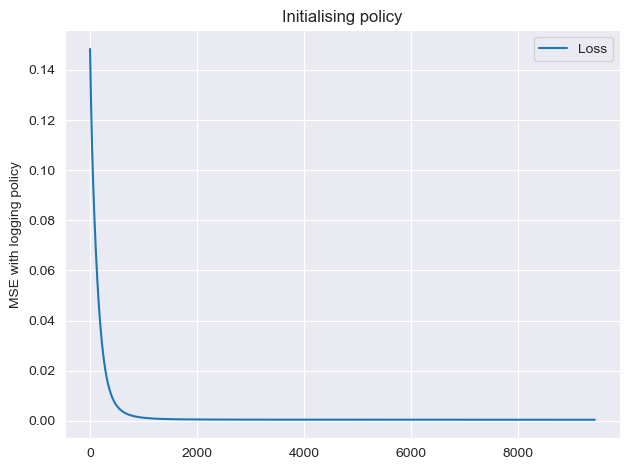

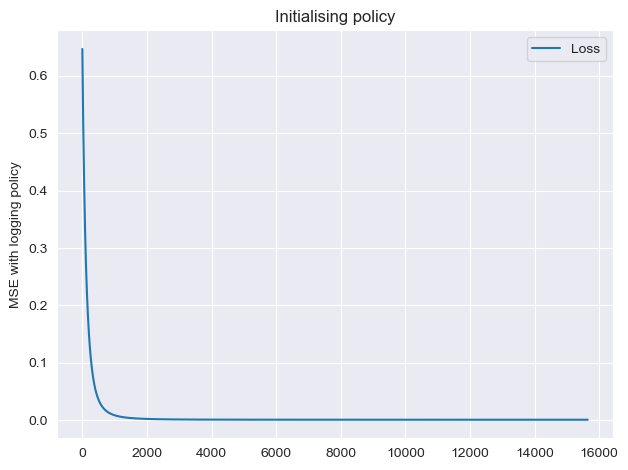

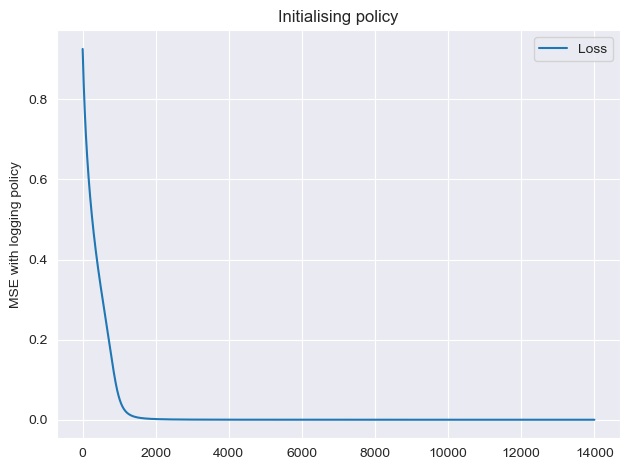

In [15]:
shaded_revenue, shaded_welfare, shaded_surplus = run_repeated_auctions()

In [20]:
agent

array([-1.08421319, -0.33774737, -0.00278424,  0.03395832,  0.02042186,
        0.03313025,  0.03651164,  0.05709437,  0.07715208,  0.070519  ])

In [10]:
def set_truthful_bidders(agent_configs):
    for agent_config in agent_configs:        
        agent_config['bidder'] = {
            'type': 'TruthfulBidder',
            'kwargs': {}
        }
set_truthful_bidders(agent_configs)
truthful_revenue, truthful_welfare, truthful_surplus = run_repeated_auctions()

  0%|          | 0/3 [00:00<?, ?it/s]


DR 1:  37%|███▋      | 6090/16384 [00:01<00:02, 3588.58it/s]


Stopping at Epoch 6090



DR 2:  29%|██▊       | 4675/16384 [00:01<00:02, 4600.70it/s]


Stopping at Epoch 4675



DR 3:  30%|██▉       | 4863/16384 [00:01<00:04, 2616.20it/s]


Stopping at Epoch 4863



DR 1:  11%|█         | 1833/16384 [00:00<00:04, 3479.11it/s]


Stopping at Epoch 1833



DR 2:  24%|██▍       | 3907/16384 [00:01<00:04, 3108.32it/s]


Stopping at Epoch 3907



DR 3:  12%|█▏        | 1955/16384 [00:00<00:04, 3322.11it/s]


Stopping at Epoch 1955



DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3425.61it/s][A


Stopping at Epoch 1025



DR 2:   7%|▋         | 1087/16384 [00:00<00:04, 3226.63it/s][A


Stopping at Epoch 1087



DR 3:   9%|▉         | 1474/16384 [00:00<00:04, 3333.14it/s]

Stopping at Epoch 1474


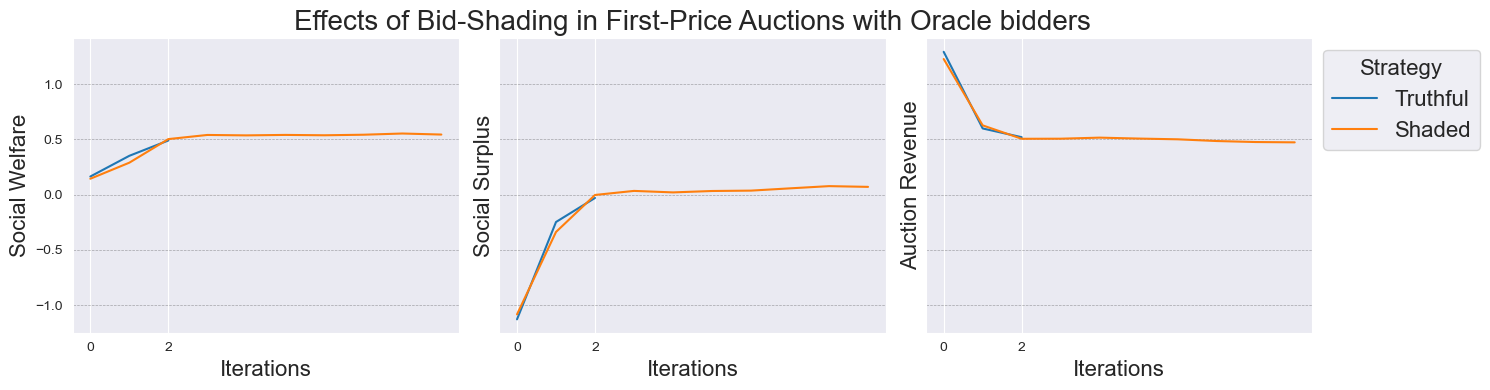

In [19]:
fontsize=16
fig, axes = plt.subplots(1, 3, sharey='row', figsize=(15,4))

axes[0].plot(truthful_welfare, label=f'Truthful')
axes[1].plot(truthful_surplus, label=f'Truthful')
axes[2].plot(truthful_revenue, label=f'Truthful')

axes[0].plot(shaded_welfare, label=f'Shaded')
axes[1].plot(shaded_surplus, label=f'Shaded')
axes[2].plot(shaded_revenue, label=f'Shaded')

axes[1].set_title('Effects of Bid-Shading in First-Price Auctions with Oracle bidders', fontsize=fontsize+4)

for i in range(3):
    axes[i].set_xlabel('Iterations', fontsize=fontsize)
    axes[i].set_xticks(list(range(0,len(truthful_revenue),2)))
    axes[i].grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
    
axes[0].set_ylabel('Social Welfare', fontsize=fontsize)
axes[1].set_ylabel('Social Surplus', fontsize=fontsize)
axes[2].set_ylabel('Auction Revenue', fontsize=fontsize)

legend = axes[2].legend(loc='upper left',
                        bbox_to_anchor=(1.0, 1.0),
                        fontsize=fontsize)
legend.set_title('Strategy', prop={'size': fontsize})
fig.tight_layout()

plt.show()

The leftmost plot shows social welfare (the sum of generated welfare over all participants in the auction).
Whether participants shade their bids (or not) does not have affect welfare: indeed, the value that is generated by the ads that are shown remains unchanged.

The middle plot shows social surplus.
Bidding truthfully in a first-price auction gives an expected surplus of 0.
As bidders start to shade their bids, we can see that bidders succesfully generate surplus.

The rightmost plot shows revenue for the auctioneer.
When bidders bid truthfully, the monetary value for all generated welfare goes to the auctioneer.
As bidders start to shade their bids, we can see that revenue diminishes as surplus increases.